## Goal emulation and planning in perceptual space using learned affordances
- The learning process consists of the following two steps: 
    - The unsupervised learning of effect categories
    - The learning of mapping from object features to the effect categories. 

In [1]:
%matplotlib inline
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
from io import StringIO
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [2]:
def read_arff(fPath):
    content=""
    f = StringIO(content)
    data, meta = arff.loadarff(fPath)
    return data

In [3]:
def run_SVM(train, train_label, test, test_label):
    svm_clf = SVC(decision_function_shape='ovr')
    svm_clf.set_params(C= 100,
    gamma= 0.001,
    kernel= 'rbf')
    svm_clf.fit(train, train_label)
    pred = svm_clf.predict(test)
    svm_acc = accuracy_score(test_label, pred)
    print(svm_acc)
    return  pred

In [4]:
def calc_acc(test_label, pred_label):
    channel_dict = dict()
    for c in set(test_label):
        channel_dict[c]={'Actual':0,'Pred':0}
    for actual, prediction in zip(test_label,pred_label):
        channel_dict[actual]['Actual'] += 1
        if actual==prediction:
            channel_dict[actual]['Pred'] += 1
    df_acc = pd.DataFrame(channel_dict).T
    df_acc['Accuracy'] = round((df_acc['Pred'] / df_acc['Actual'])*100,2)
    return df_acc

In [5]:
def standardize(df_std,cols):
    scaler = StandardScaler()
    for col in cols:
        scaler = scaler.fit(df_std[[col]])
        standardized = scaler.transform(df_std[[col]])
        df_std[col+'_std']=standardized
    return df_std

In [6]:
def normalize(df_nor,cols):
    normalizer = Normalizer()
    for col in cols:
        normalizer = normalizer.fit(df_nor[[col]])
        normalized = normalizer.transform(df_nor[[col]])
        df_nor[col+'_nor']=normalized
    return df_nor

### Effect Category Discovery for Behavior#3
- In the lower level, clustering in the space of each channel (visibility, position and shape) results in the discovery of channel-specific effect categories.
- In the upper level, the channel-specific effect categories are merged to discover all-channel effect categories using the Cartesian product operation.

In [131]:
f_paths =['/home/berna/PycharmProjects/MSc/Robot Learning/AffordanceLearning/result/result_3/channel_1.arff',
          '/home/berna/PycharmProjects/MSc/Robot Learning/AffordanceLearning/result/result_3/channel_2.arff',
          '/home/berna/PycharmProjects/MSc/Robot Learning/AffordanceLearning/result/result_3/channel_3.arff']
object_feature_f_path = '/home/berna/PycharmProjects/MSc/Robot Learning/AffordanceLearning/result/initial/initial_3.arff'

In [132]:
target='Channel'
channels = ['Channel_1','Channel_2', 'Channel_3', ]
all_features= [ 'f_000', 'f_001', 'f_002', 'f_003', 'f_004', 'f_005',
       'f_006', 'f_007', 'f_008', 'f_009', 'f_010', 'f_011', 'f_012', 'f_013',
       'f_014', 'f_015', 'f_016', 'f_017', 'f_018', 'f_019', 'f_020', 'f_021',
       'f_022', 'f_023', 'f_024', 'f_025', 'f_026', 'f_027', 'f_028', 'f_029',
       'f_030', 'f_031', 'f_032', 'f_033', 'f_034', 'f_035', 'f_036', 'f_037',
       'f_038', 'f_039', 'f_040', 'f_041', 'f_042']
feature_set_1 = ['f_000']
feature_set_2 = ['f_001', 'f_002', 'f_003', 'f_004', 'f_005','f_006']
feature_set_3 = ['f_007', 'f_008', 'f_009', 'f_010', 'f_011', 'f_012', 'f_013',
       'f_014', 'f_015', 'f_016', 'f_017', 'f_018', 'f_019', 'f_020', 'f_021',
       'f_022', 'f_023', 'f_024', 'f_025', 'f_026', 'f_027', 'f_028', 'f_029',
       'f_030', 'f_031', 'f_032', 'f_033', 'f_034', 'f_035', 'f_036', 'f_037',
       'f_038', 'f_039', 'f_040', 'f_041', 'f_042']
all_features_std = [f + '_std' for f in all_features]
feature_set_1_std = [f + '_std' for f in feature_set_1]
feature_set_2_std = [f + '_std' for f in feature_set_2]
feature_set_3_std = [f + '_std' for f in feature_set_3]
all_features_nor = [f + '_nor' for f in all_features]
feature_set_1_nor = [f + '_nor' for f in feature_set_1]
feature_set_2_nor = [f + '_nor' for f in feature_set_2]
feature_set_3_nor = [f + '_nor' for f in feature_set_3]

In [133]:
low_channels = []
for idx,fPath in enumerate(f_paths):
    channel = read_arff(fPath)
    df = pd.DataFrame(channel)[['Instance_number','Cluster']]
    df['Cluster'] = df['Cluster'].apply(lambda x: 'chan' + str(idx +1) + '_' + str(x, 'utf-8'))
    df = df.rename(columns={'Cluster': 'Channel_' + str(idx +1)})
    low_channels.append(df)

In [134]:
df_cluster = pd.merge(pd.merge(low_channels[0],low_channels[1],on='Instance_number'),low_channels[2],on='Instance_number')
df_cluster['Channel'] = df_cluster['Channel_1'] + '_' + df_cluster['Channel_2'] + '_' + df_cluster['Channel_3']


#### The Visibility Channel (Channel#1)

In [135]:
(df_cluster.groupby(['Channel_1']).count()[['Instance_number']] / df_cluster.count()[['Instance_number']]*100).round(2)

,Instance_number
Channel_1,
chan1_cluster0,22.59
chan1_cluster1,77.41


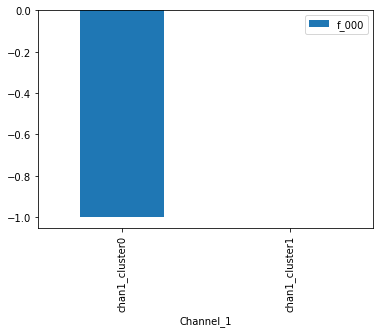

In [136]:
df_cluster_features.groupby('Channel_1').mean().reset_index()[['Channel_1'] + feature_set_1].plot(x='Channel_1',kind='bar')

#### The Position Channel (Channel#2)

In [137]:
(df_cluster.groupby(['Channel_2']).count()[['Instance_number']] / df_cluster.count()[['Instance_number']]*100).round(2)

,Instance_number
Channel_2,
chan2_cluster0,16.61
chan2_cluster1,31.77
chan2_cluster2,50.56
chan2_cluster3,1.07


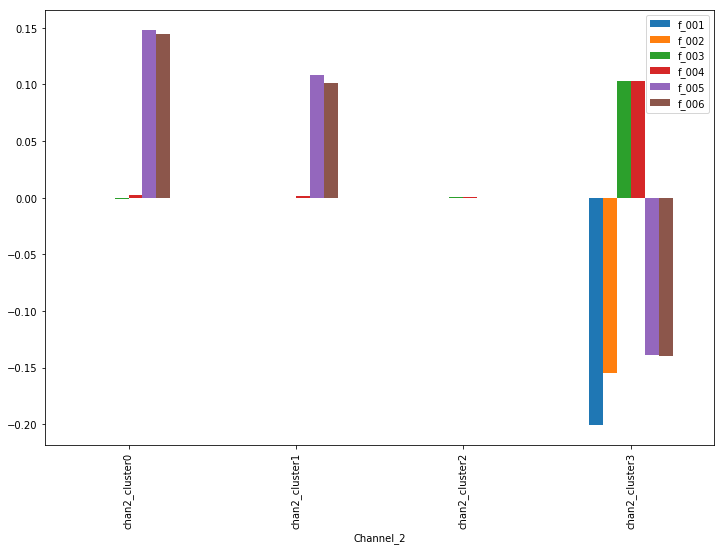

In [138]:
df_cluster_features.groupby('Channel_2').mean().reset_index()[['Channel_2'] + feature_set_2].plot(x='Channel_2',kind='bar',figsize=(12,8))

#### The Shape Channel (Channel#3)

In [139]:
(df_cluster.groupby(['Channel_3']).count()[['Instance_number']] / df_cluster.count()[['Instance_number']]*100).round(2)

,Instance_number
Channel_3,
chan3_cluster0,3.42
chan3_cluster1,6.91
chan3_cluster2,14.53
chan3_cluster3,75.13


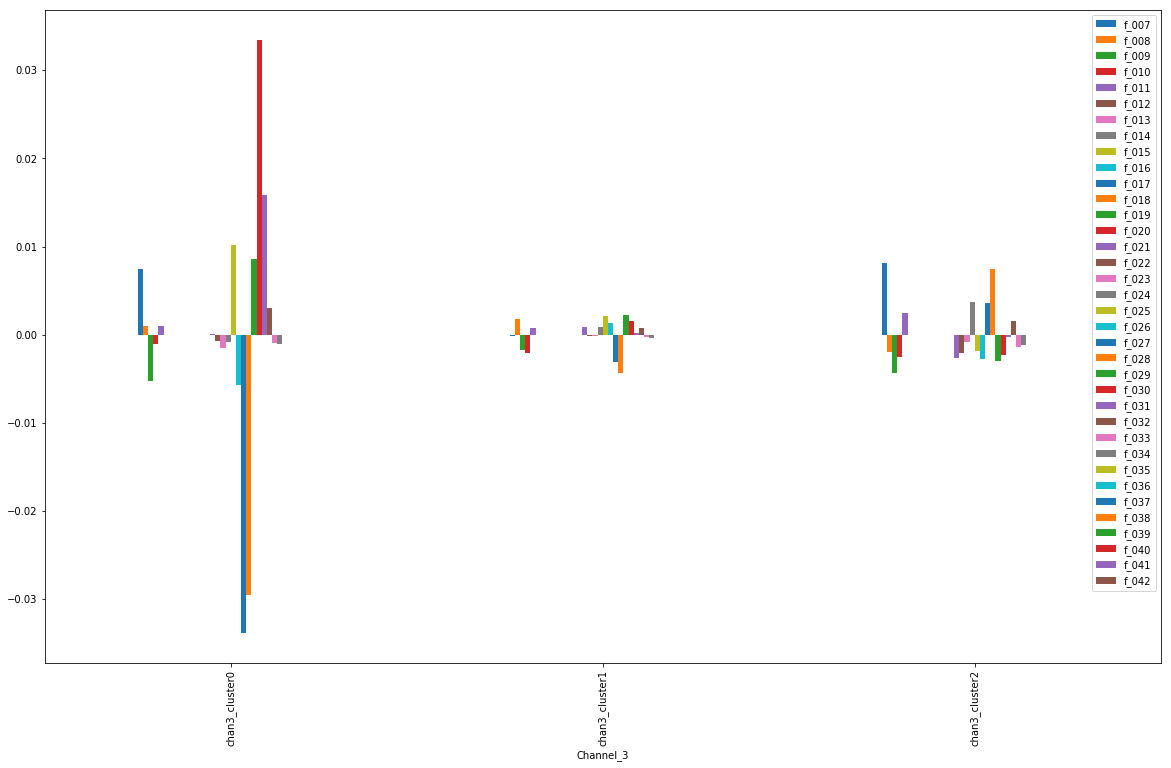

In [140]:
df_cluster_features.groupby('Channel_3').mean().reset_index()[['Channel_3'] + feature_set_3].plot(x='Channel_3',kind='bar',figsize=(20,12))

In [141]:
df_cluster_features = pd.merge(df_cluster,pd.DataFrame(channel)[all_features +['Instance_number']],on=['Instance_number'])
#df_cluster_features = normalize(df_cluster_features,all_features)

#### All-channel Effect Categories

In [142]:
(df_cluster.groupby(['Channel']).count()[['Instance_number']] / df_cluster.count()[['Instance_number']]*100).round(2)

,Instance_number
Channel,
chan1_cluster0_chan2_cluster2_chan3_cluster3,22.59
chan1_cluster1_chan2_cluster0_chan3_cluster0,0.10
chan1_cluster1_chan2_cluster0_chan3_cluster1,0.40
chan1_cluster1_chan2_cluster0_chan3_cluster2,12.65
chan1_cluster1_chan2_cluster0_chan3_cluster3,3.47
chan1_cluster1_chan2_cluster1_chan3_cluster0,3.10
chan1_cluster1_chan2_cluster1_chan3_cluster1,5.65
chan1_cluster1_chan2_cluster1_chan3_cluster2,1.35
chan1_cluster1_chan2_cluster1_chan3_cluster3,21.66


In [149]:
dropped_channels = ['chan1_cluster1_chan2_cluster0_chan3_cluster0','chan1_cluster1_chan2_cluster2_chan3_cluster0',
                   'chan1_cluster1_chan2_cluster3_chan3_cluster2']

In [150]:
df_object_feature = pd.DataFrame(read_arff(fPath))
data_set = pd.merge(df_object_feature,df_cluster,on='Instance_number')
data_set=standardize(data_set,all_features)

In [151]:
all_channels = ['Channel_1', 'Channel_2', 'Channel_3','Channel']

### Learning Effect Category Prediction
- A SVM classifier is trained to predict the effect category for a given feature vector and a behavior.
- For the Behavior#3 (Lift Behaviour), each channel is separately predicted. Also, all-channel effect categories are predicted. 
- The prediction accuracy for the visibility channel and the position channel is higher than for the shape channel.
- When the rare clusters are removed, the accuracy increases from 84% to 85% for all-channel effect categories.
- When the position features are removed, the predictability of all-channel, channel#2 and channel#3 decrease.

In [152]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(data_set[all_features + all_channels], data_set[all_channels],
                                                                  test_size=0.2, train_size=0.8)

xTrain_red = copy.deepcopy(xTrain)
xTest_red = copy.deepcopy(xTest)

for channel in dropped_channels:    
    xTrain_red = copy.deepcopy(xTrain_red.loc[xTrain_red['Channel'] != channel])
    xTest_red = copy.deepcopy(xTest_red.loc[xTest_red['Channel'] != channel])


In [153]:
for channel in all_channels:
    if channel =='Channel':
        print('Prediction Accuracy for All-channel')
    else:
        print('Prediction Accuracy for %s' % channel)
    all_pred = run_SVM(np.asarray(xTrain[all_features]), np.asarray(xTrain[channel]),
                       np.asarray(xTest[all_features]), np.asarray(xTest[channel]))

Prediction Accuracy for Channel_1
1.0
Prediction Accuracy for Channel_2
0.9905234657039711
Prediction Accuracy for Channel_3
0.8578519855595668
Prediction Accuracy for All-channel
0.848826714801444


In [154]:
for channel in all_channels:
    if channel =='Channel':
        print('Prediction Accuracy for All-channel')
    else:
        print('Prediction Accuracy for %s' % channel)
    all_pred = run_SVM(np.asarray(xTrain_red[all_features]), np.asarray(xTrain_red[channel]),
                       np.asarray(xTest_red[all_features]), np.asarray(xTest_red[channel]))

Prediction Accuracy for Channel_1
1.0
Prediction Accuracy for Channel_2
0.990506329113924
Prediction Accuracy for Channel_3
0.8580470162748643
Prediction Accuracy for All-channel
0.8503616636528029


In [158]:
for channel in all_channels:
    if channel =='Channel':
        print('Prediction Accuracy for All-channel')
    else:
        print('Prediction Accuracy for %s' % channel)
    all_pred = run_SVM(np.asarray(xTrain[feature_set_1 + feature_set_3]), np.asarray(xTrain[channel]),
                       np.asarray(xTest[feature_set_1 + feature_set_3]), np.asarray(xTest[channel]))

Prediction Accuracy for Channel_1
1.0
Prediction Accuracy for Channel_2
0.6863718411552346
Prediction Accuracy for Channel_3
0.8235559566787004
Prediction Accuracy for All-channel
0.5537003610108303
